In [22]:
from collections import OrderedDict

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# from lightgbm import LGBMClassifier

# 모델 import
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# import xgboost as xgb
import statsmodels.formula.api as smf
import statsmodels.api as sm
# import graphviz
# import pydotplus

# EDA package
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl


# warnings 끄기
warnings.filterwarnings('ignore')

# pandas display option view row & columns
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1000)

# # matplotlib set
plt.rc('font', family='DejaVu Sans')  # For MacOS
plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [5]:
data = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
'''
Attrition --> 퇴직 여부이므로 해당 변수가 바로 종속변수임 
종속변수와 다른변수간의 상관관계를 파악해보자 !!!
'''

'\nAttrition --> 퇴직 여부이므로 해당 변수가 바로 종속변수임 \n종속변수와 다른변수간의 상관관계를 파악해보자 !!!\n'

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# gender ; male, female -> convert as int64
# Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, 
# RelationshipSatisfaction, WorkLifeBalance, JobLevel, StockOptionLevel, NumCompaniesWorked
# ----> category columns 인데 int로 되어있어서 type convert 해야함

In [10]:
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
data.replace({'Education' : change_dict}, inplace=True)
data['Education'].head()

0          College
1    Below College
2          College
3           Master
4    Below College
Name: Education, dtype: object

In [11]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction' : change_dict}, inplace=True)
data.EnvironmentSatisfaction.unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [12]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobInvolvement' : change_dict}, inplace=True)
data.replace({'JobSatisfaction': change_dict}, inplace=True)
data['JobSatisfaction'].unique()

array(['Very High', 'Medium', 'High', 'Low'], dtype=object)

In [13]:
change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
data.replace({'PerformanceRating': change_dict}, inplace=True)
data['PerformanceRating'].unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [14]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
data['RelationshipSatisfaction'].unique()

array(['Low', 'Very High', 'Medium', 'High'], dtype=object)

In [15]:
change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)
data['WorkLifeBalance'].unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

In [16]:
data = data.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,Y,No,17,Excellent,High,80,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,Y,No,15,Excellent,Low,80,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Y,Yes,20,Outstanding,Medium,80,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,Y,No,14,Excellent,Very High,80,0,17,3,Good,9,6,0,8


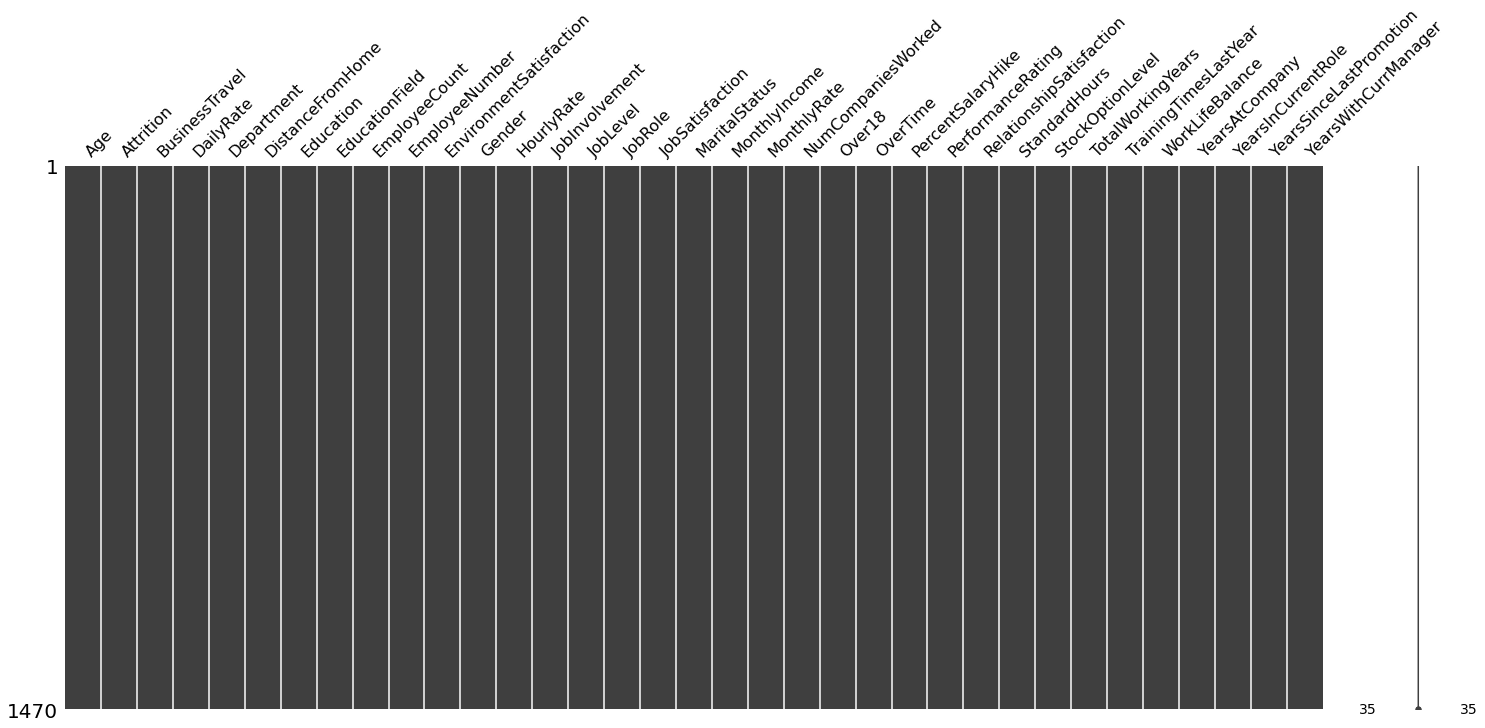

In [23]:
# 결측치 확인 (missingno)
missingno.matrix(data)
plt.show()

In [34]:
# EDA
print('Attrtiion Portage')
print(f'{data.Attrition.value_counts().index[0]} : {round(data.Attrition.value_counts()[0] / len(data) * 100, 2)} %')
print(f'{data.Attrition.value_counts().index[1]} : {round(data.Attrition.value_counts()[1] / len(data) * 100, 2)} %')

Attrtiion Portage
No : 83.88 %
Yes : 16.12 %


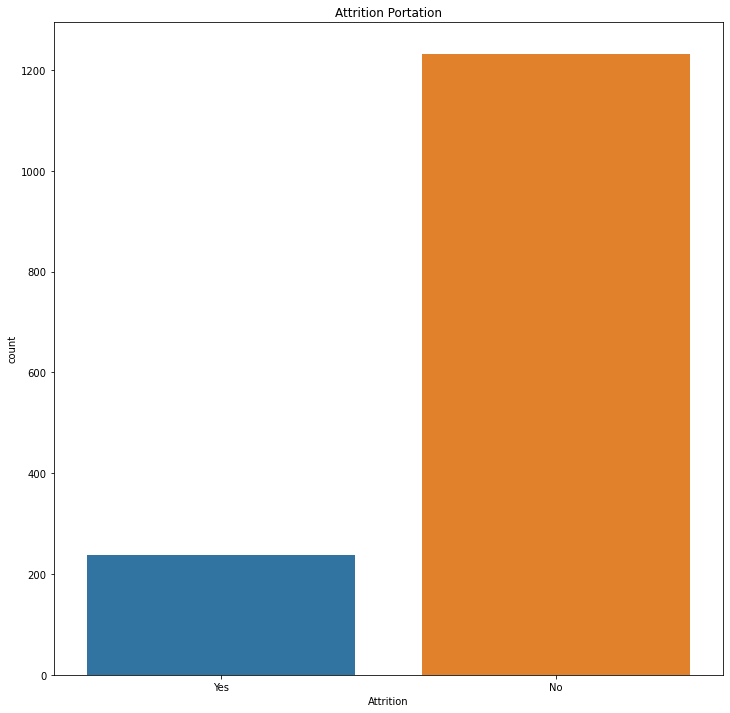

In [36]:
plt.figure(figsize=(12,12))
sns.countplot( x = data['Attrition'])
plt.title('Attrition Portation')
plt.show()

# --> 퇴사자의 데이터는 전체 데이터의 약 16% 를 차지하는 것을 알 수 있다.

In [37]:
# category columns 분포도 확인
cate_col = []
for col in data.columns :
    if data[col].dtype == 'object' :
        cate_col.append(col)
        print('=============================================================================================')
        print(f'{col} : {data[col].unique()}')
        print(f'{data[col].value_counts()}')
        print()

print()
print(f'object의 갯수 : {len(cate_col)} 개')
# 그중 Over18 컬럼이 Y값 하나만을 가지고 있을것을 알수 있었으며, 그 외 다른 컬럼은 큰 이상이 없어 보임.

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']


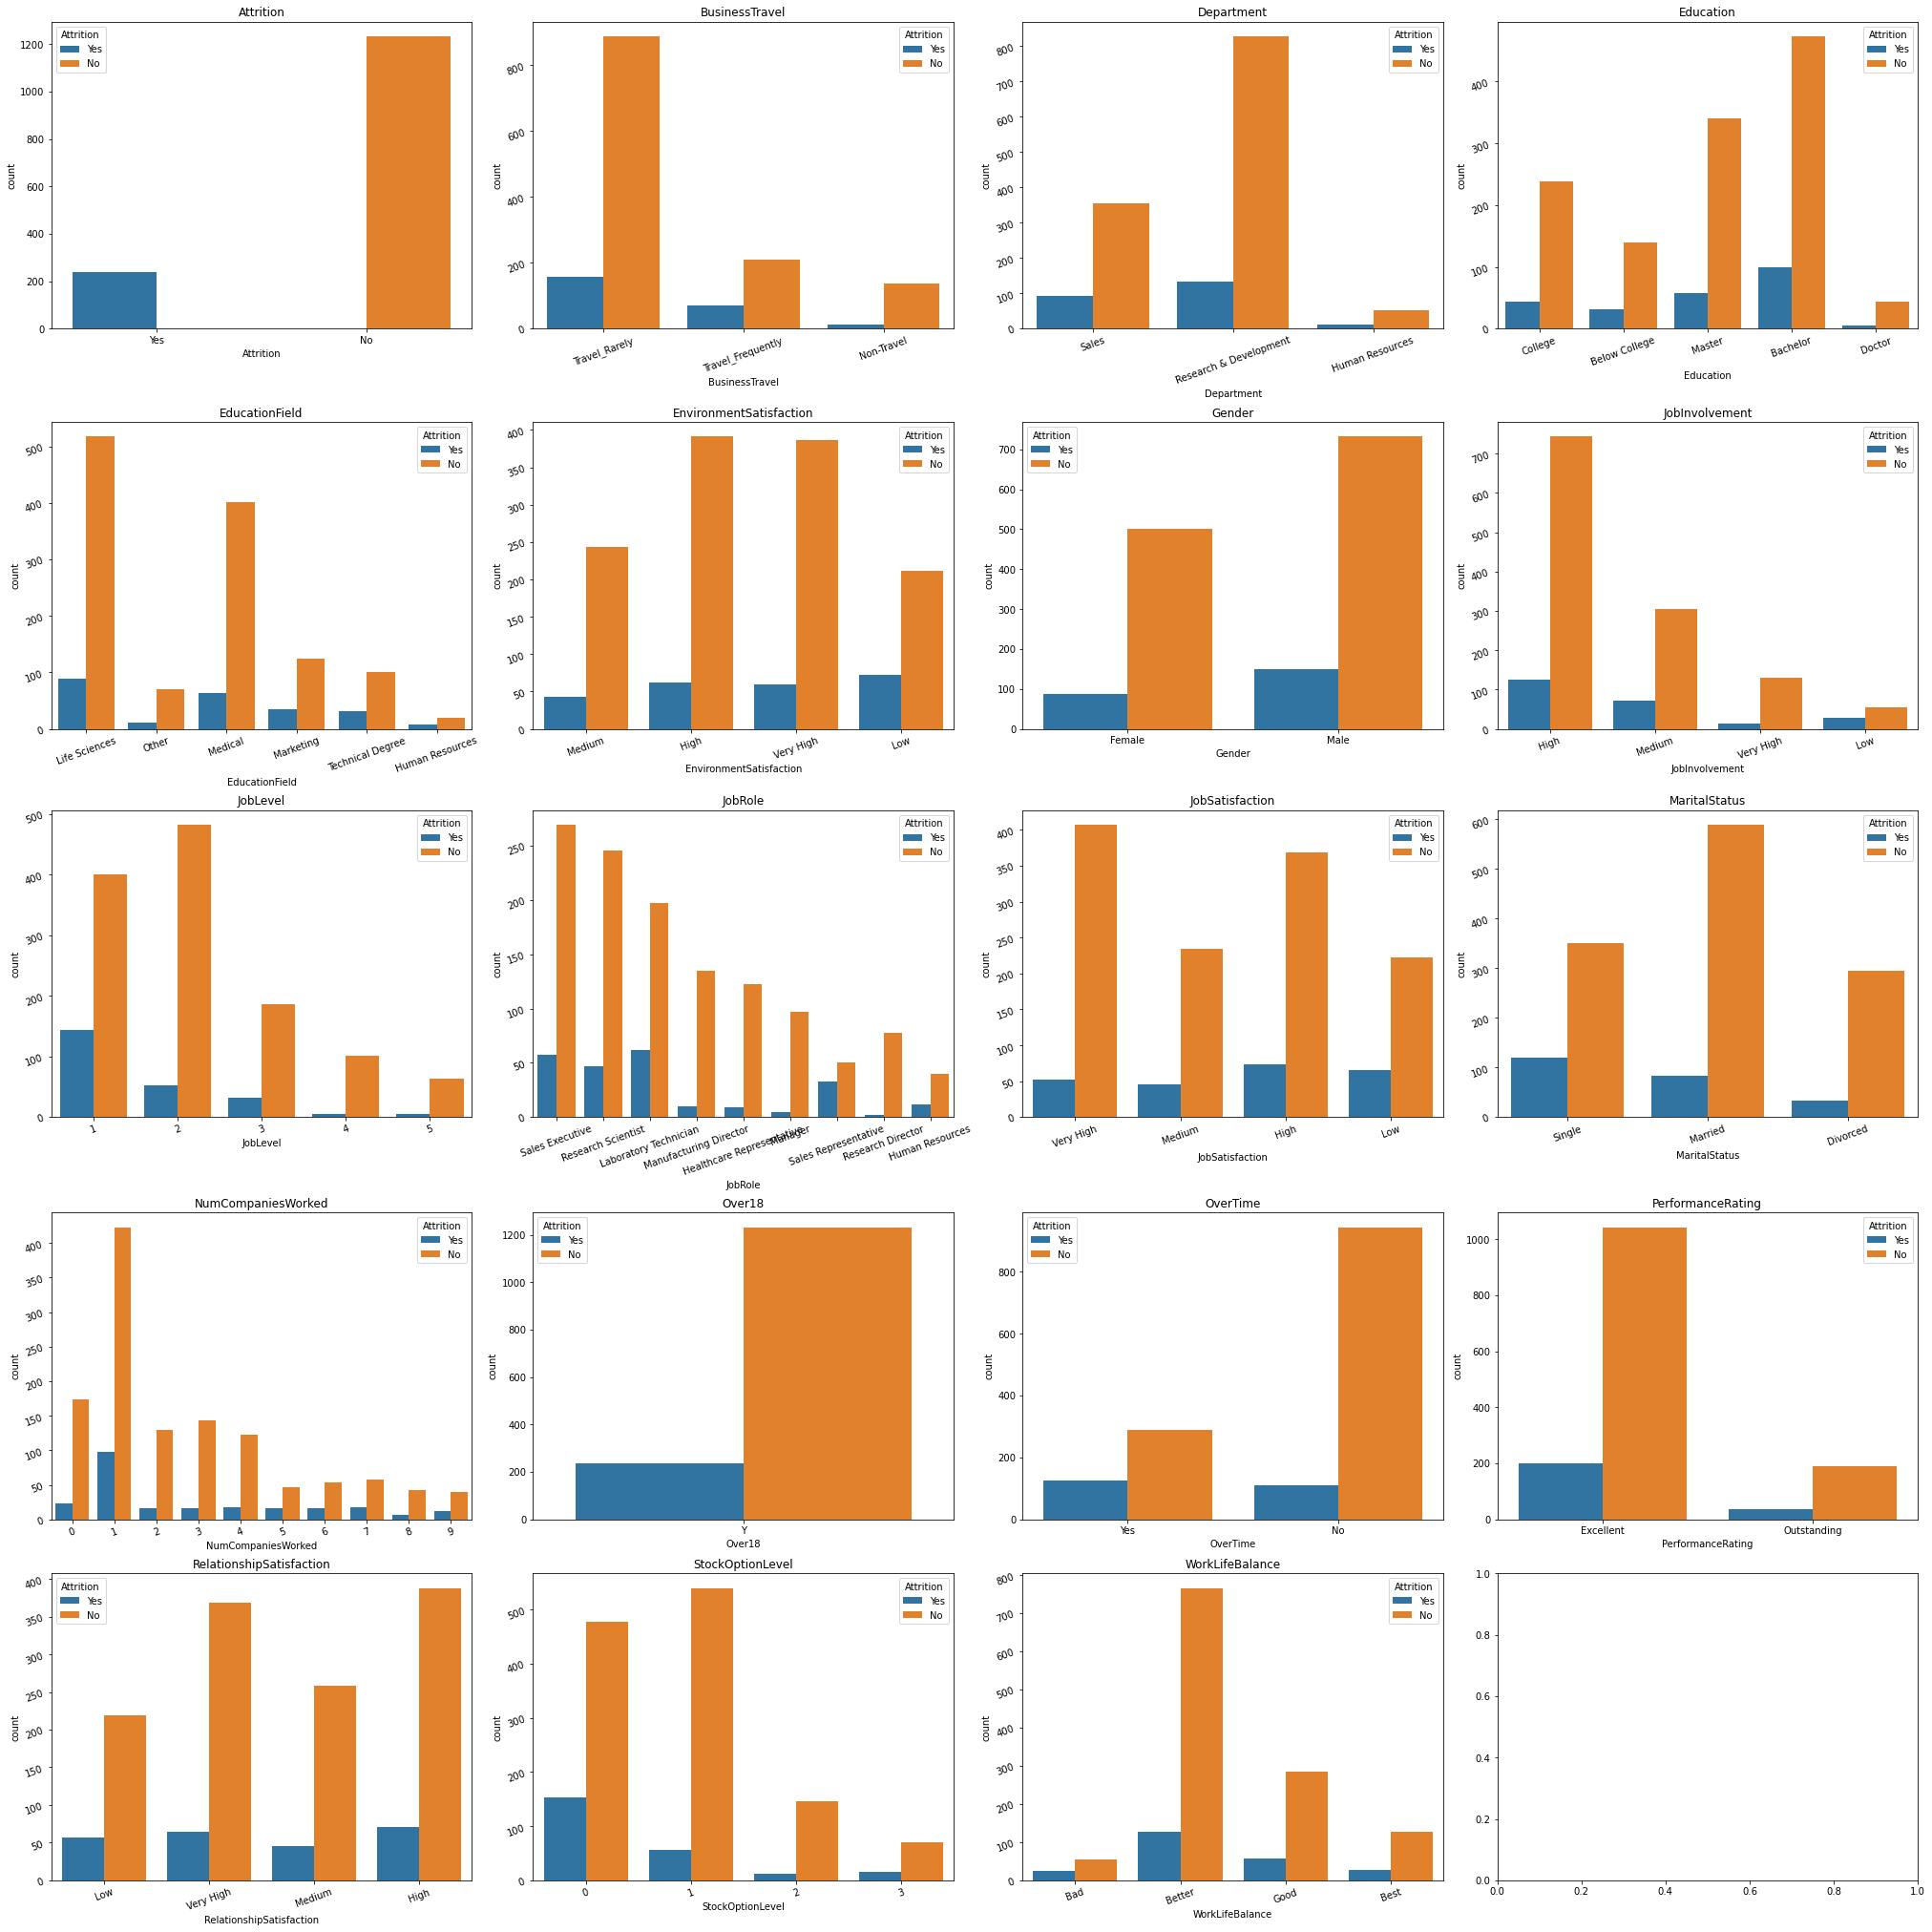

In [42]:
# category column 그래프로 보기
fig, ax = plt.subplots(5, 4, figsize=(28,28), constrained_layout=True)
ax = ax.flatten()

for idx in range(len(cate_col)) :
    sns.countplot(x=cate_col[idx], data=data, hue='Attrition', ax=ax[idx])
    ax[idx].set(title = cate_col[idx])

    if data[cate_col[idx]].nunique() >= 3 :
        ax[idx].tick_params(labelrotation=20)

plt.show()

In [45]:
cont_cols = []
for col in data.columns :
    if data[col].dtype != 'object' :
        cont_cols.append(col)
        print(f'{col} : {data[col].nunique()}')
        print(f'{data[col].unique()}')
        print('==============================')

print()
print(f'cont columns : {len(cont_cols)} 개')

Age : 43
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
DailyRate : 886
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 1268  713  

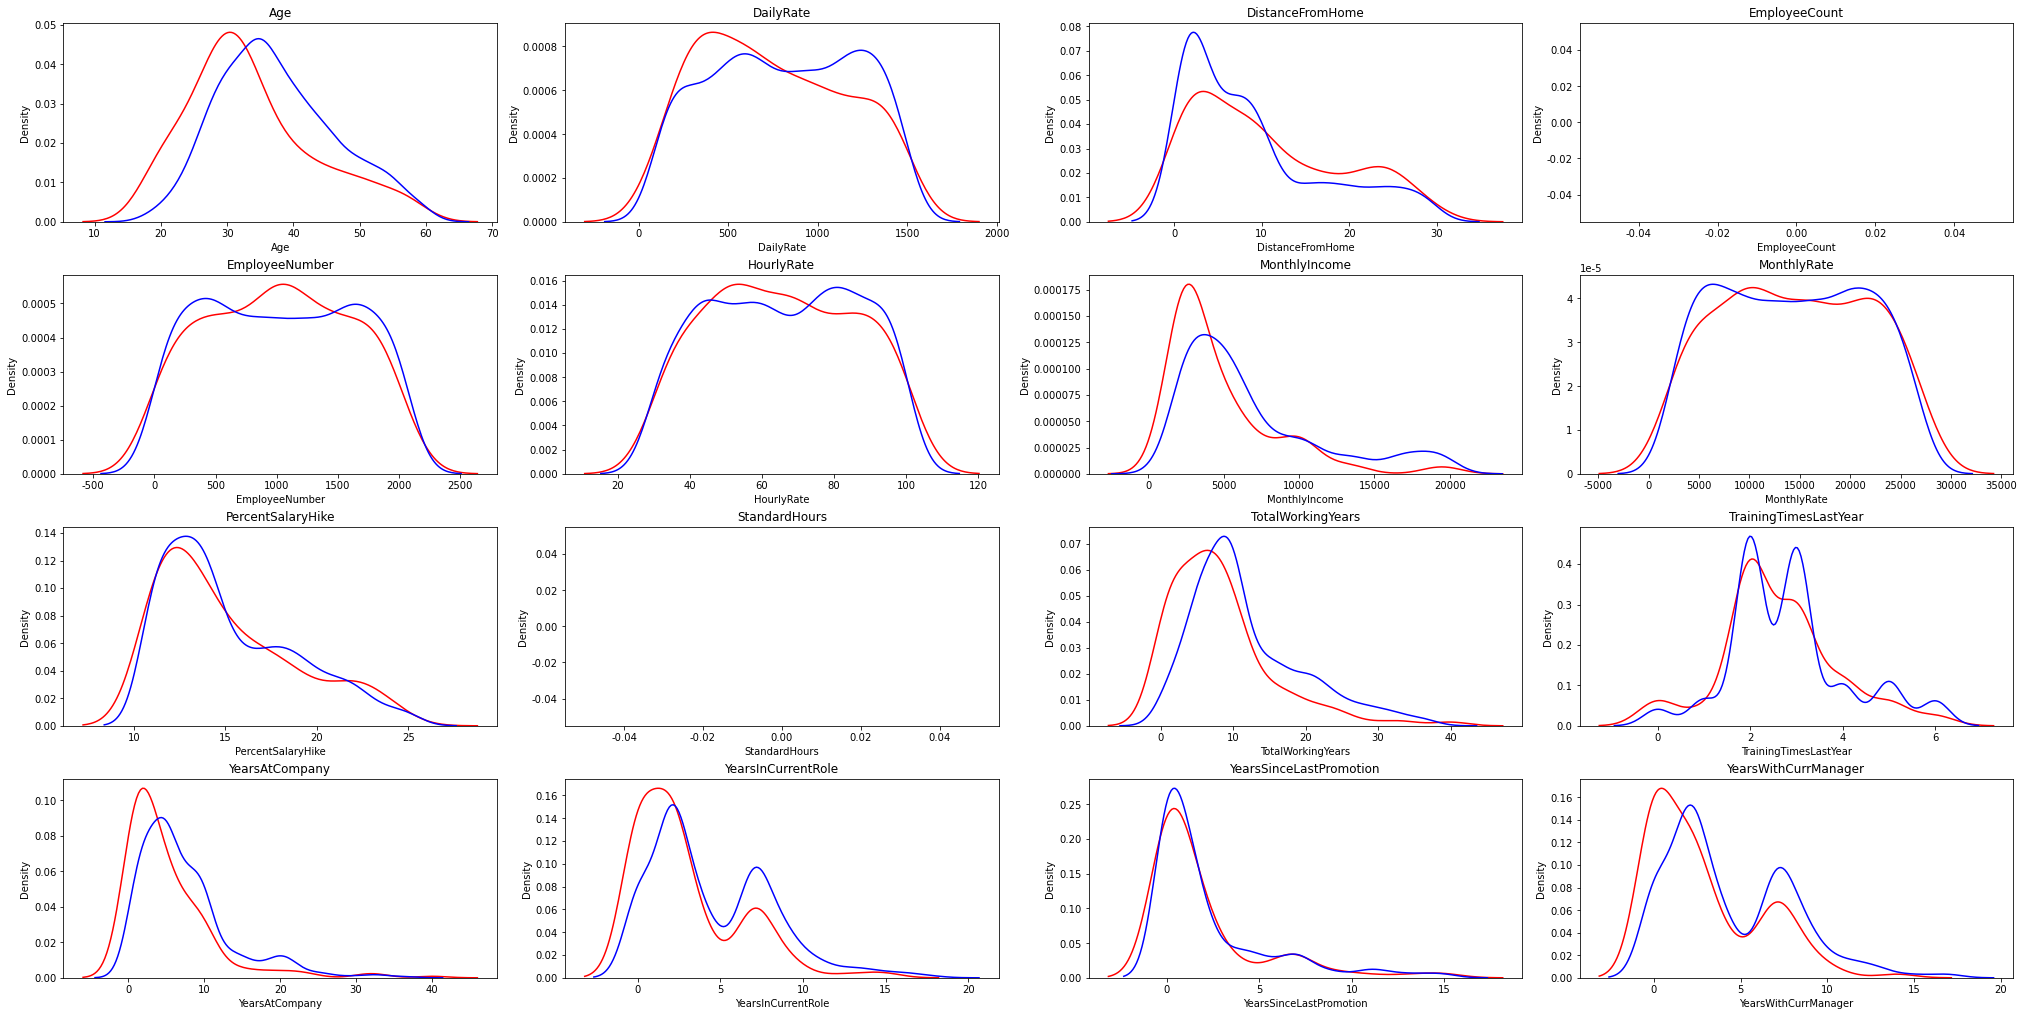

In [50]:
fig, ax = plt.subplots(4, 4, figsize=(28,14), constrained_layout=True)
ax = ax.flatten()

for idx in range(len(cont_cols)) :
    sns.distplot(data[data['Attrition']=='Yes'][cont_cols[idx]], ax=ax[idx], color='red', hist=False)
    sns.distplot(data[data['Attrition']=='No'][cont_cols[idx]], ax=ax[idx], color='blue', hist=False)
    ax[idx].set(title=cont_cols[idx])

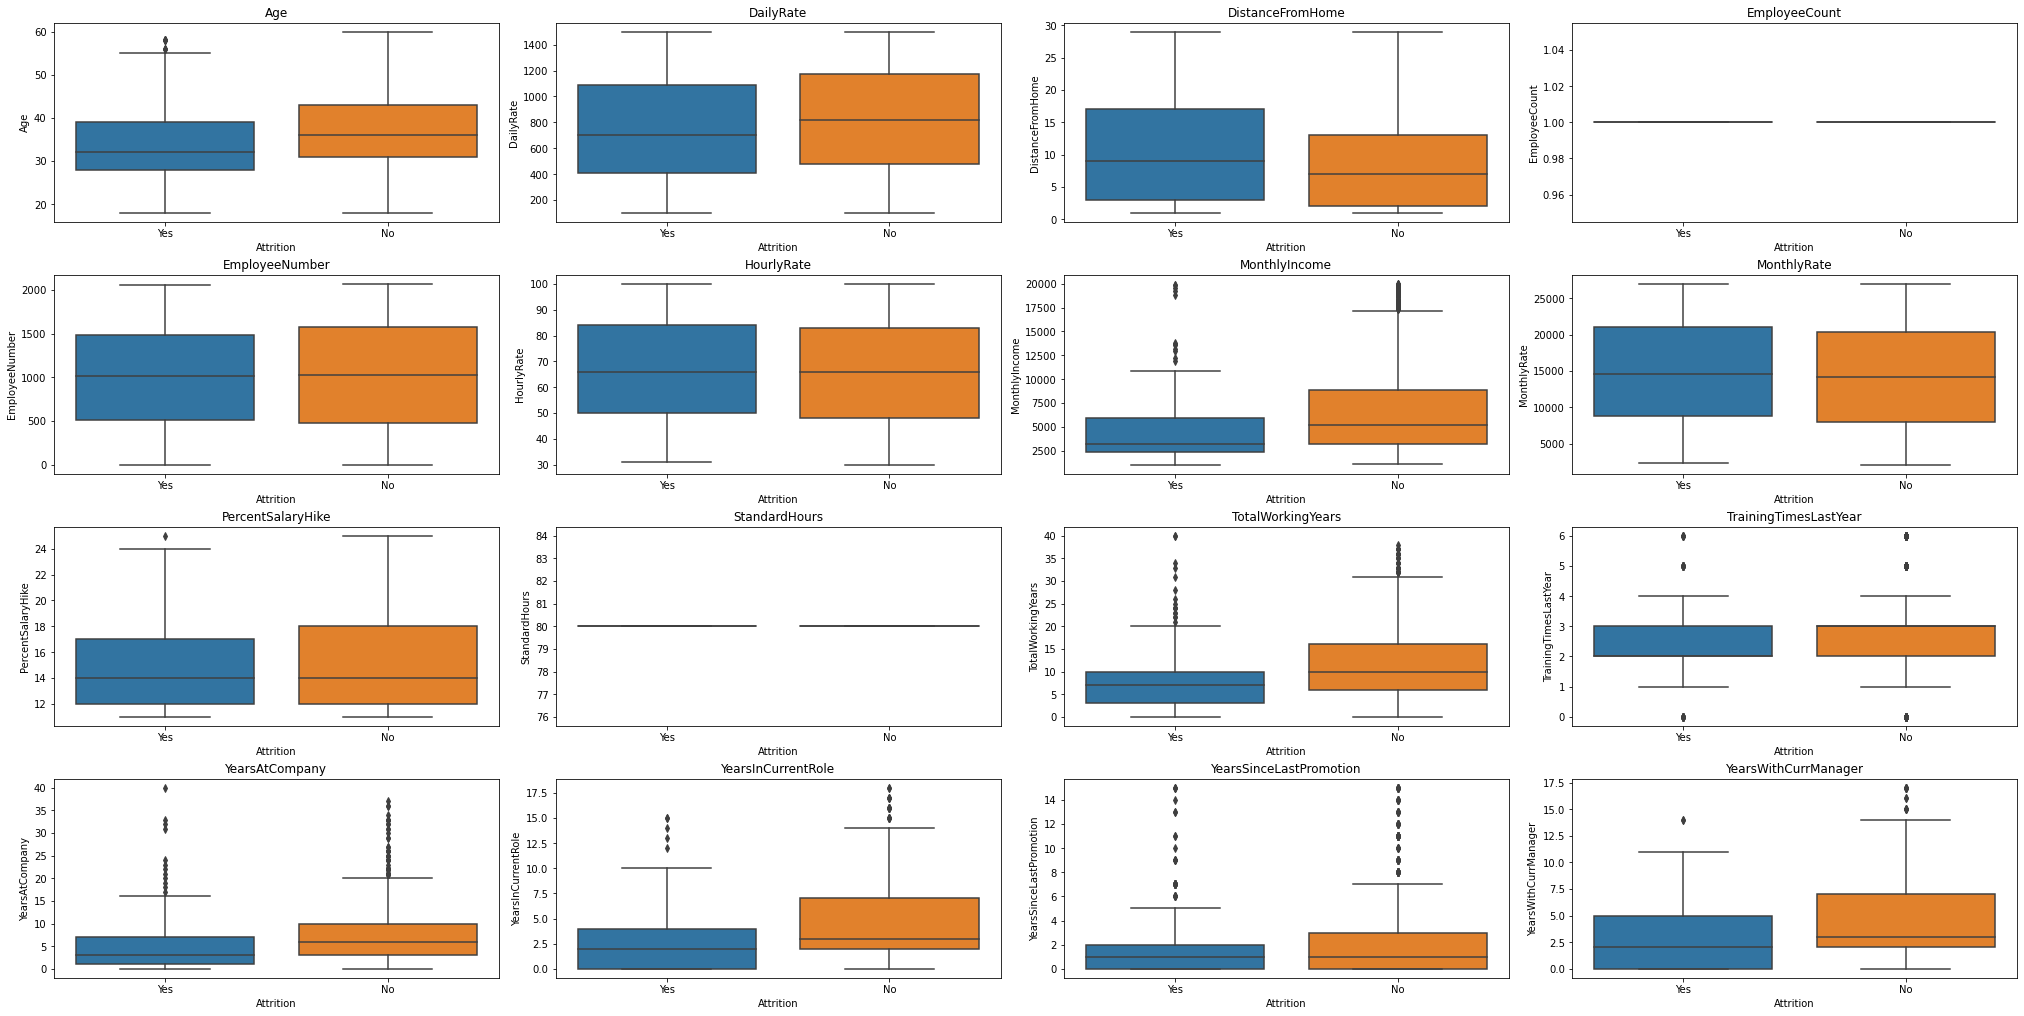

In [51]:
fig, ax = plt.subplots(4, 4, figsize=(28,14), constrained_layout=True)
ax = ax.flatten()

for idx in range(len(cont_cols)) :
    sns.boxplot(x=data['Attrition'], y=data[cont_cols[idx]], ax=ax[idx])
    ax[idx].set(title=cont_cols[idx])

In [52]:
# Delete columns that don't need.
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,82,Very High,2,Laboratory Technician,High,Married,4404,10228,2,No,12,Excellent,Low,0,6,3,Best,4,3,1,2


In [56]:
# chek corr
data_cp = data.copy()
data_cp = pd.get_dummies(data_cp, drop_first=True)
data_cp = data_cp[['Attrition_Yes'] + [col for col in data_cp.columns if col != 'Attrition_Yes']]
data_corr = data_cp.corr()
data_corr.shape

(71, 71)

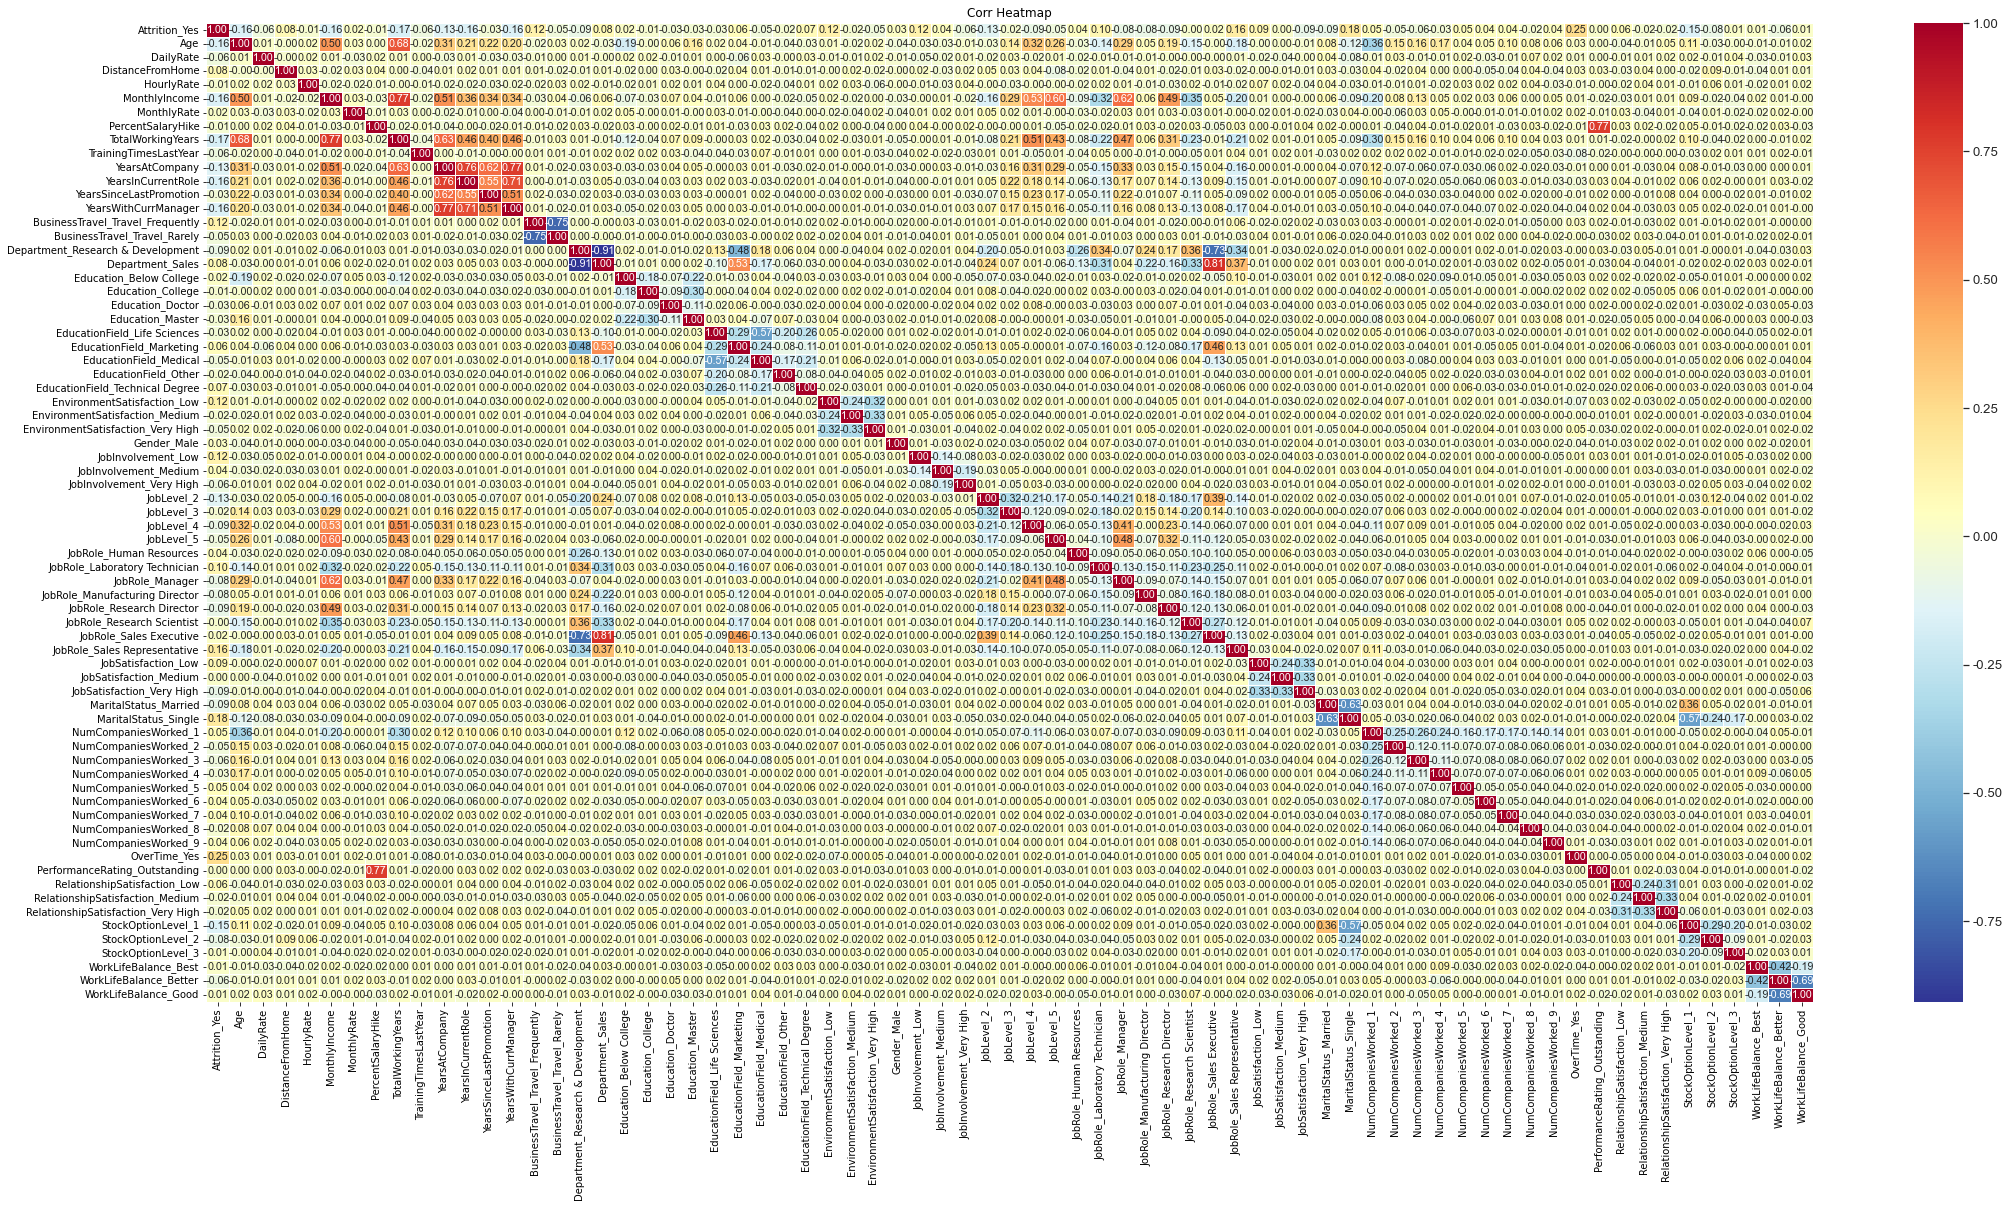

In [57]:
plt.figure(figsize=(36, 18))
plt.title('Corr Heatmap')

# 실제 히트맵 그리는 코드
sns.set(font_scale=1.2)
sns.heatmap(data_corr, annot=True, annot_kws={
    "size": 90 / np.sqrt(len(data_corr))}, fmt='.2f', cmap='RdYlBu_r', linewidths=0.5,)
plt.savefig('corrmap.png')
plt.show()

In [60]:
temp = data_corr[(data_corr > 0.4) | (data_corr < -0.4)]
high_corr = []
for c in temp.columns :
    tmp = temp[c].dropna()

    if len(tmp) == 1 :
        continue 
    high_corr.append([tmp.name, tmp.to_dict()])

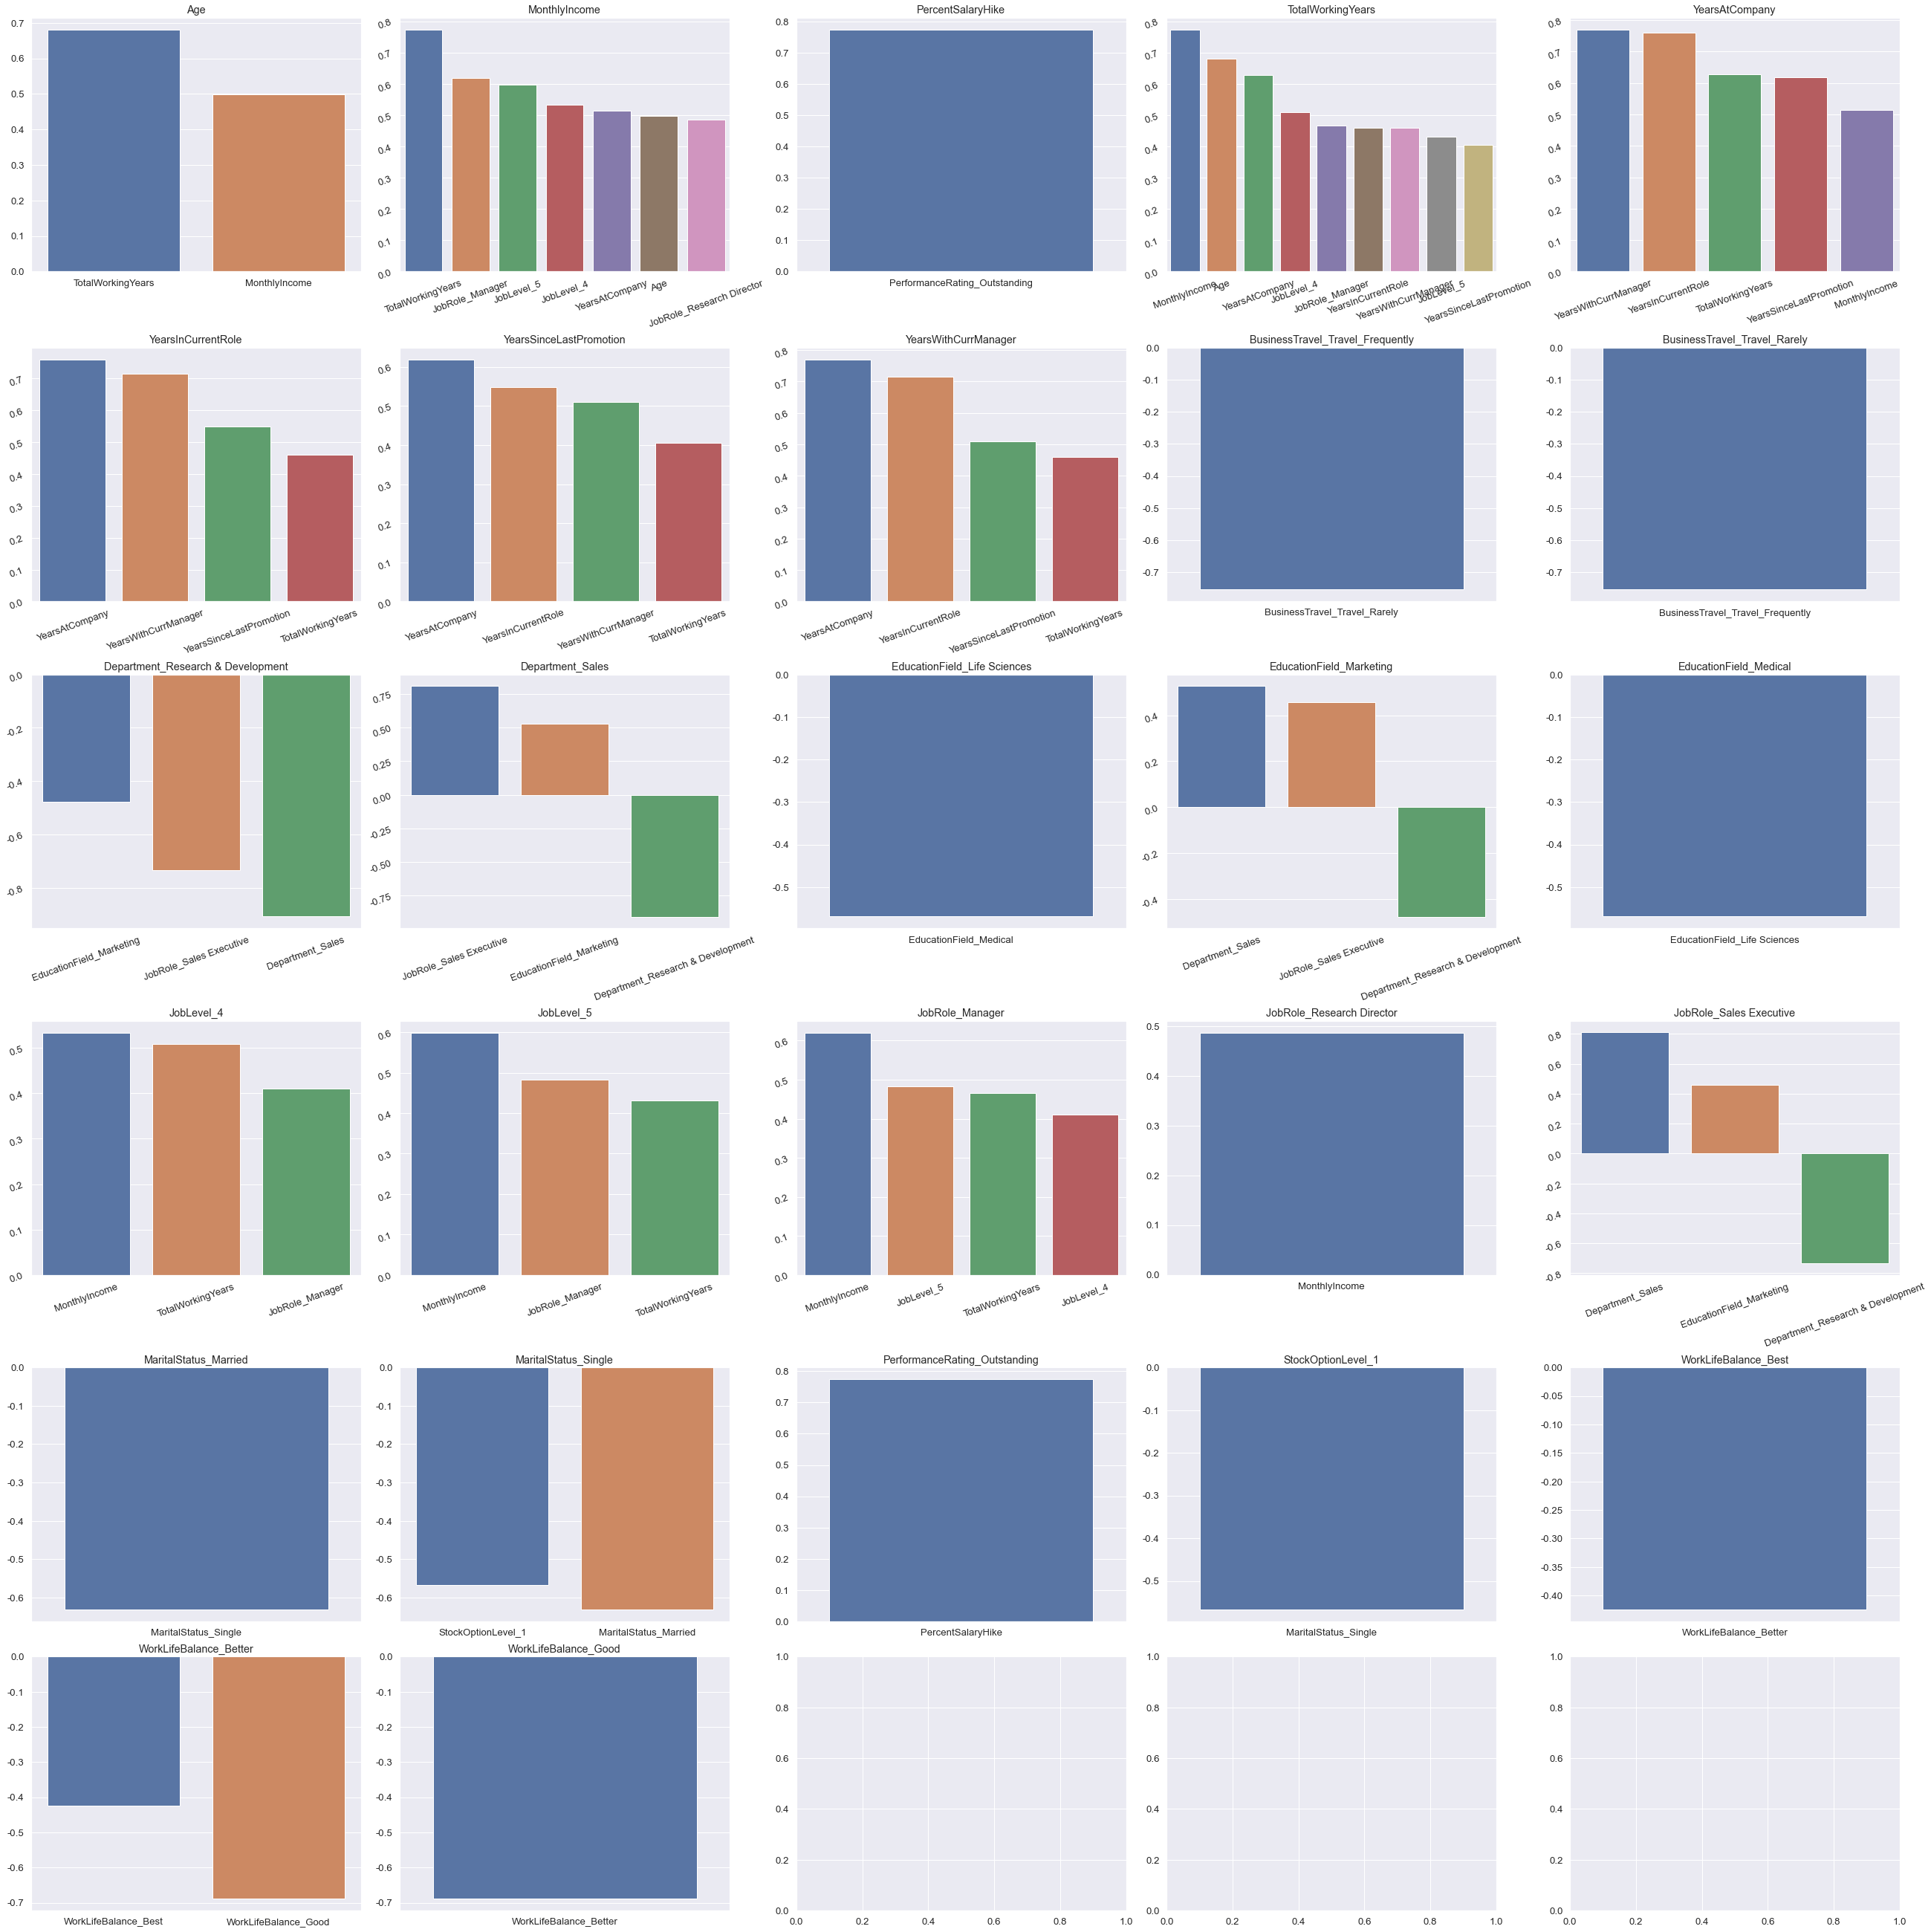

In [66]:
fig, ax = plt.subplots(6, 5, figsize=(36,36), constrained_layout=True)
ax = ax.flatten()

for idx, c in enumerate(high_corr) :
    orderDict = OrderedDict(sorted(high_corr[idx][1].items(), key=lambda t:t[1], reverse=True))
    title = orderDict.popitem(0)

    sns.barplot(x=list(orderDict.keys()), y=list(orderDict.values()), ax=ax[idx])
    ax[idx].set(title=title[0])

    if len(orderDict.keys()) > 2:
        ax[idx].tick_params(labelrotation=20)
plt.show()



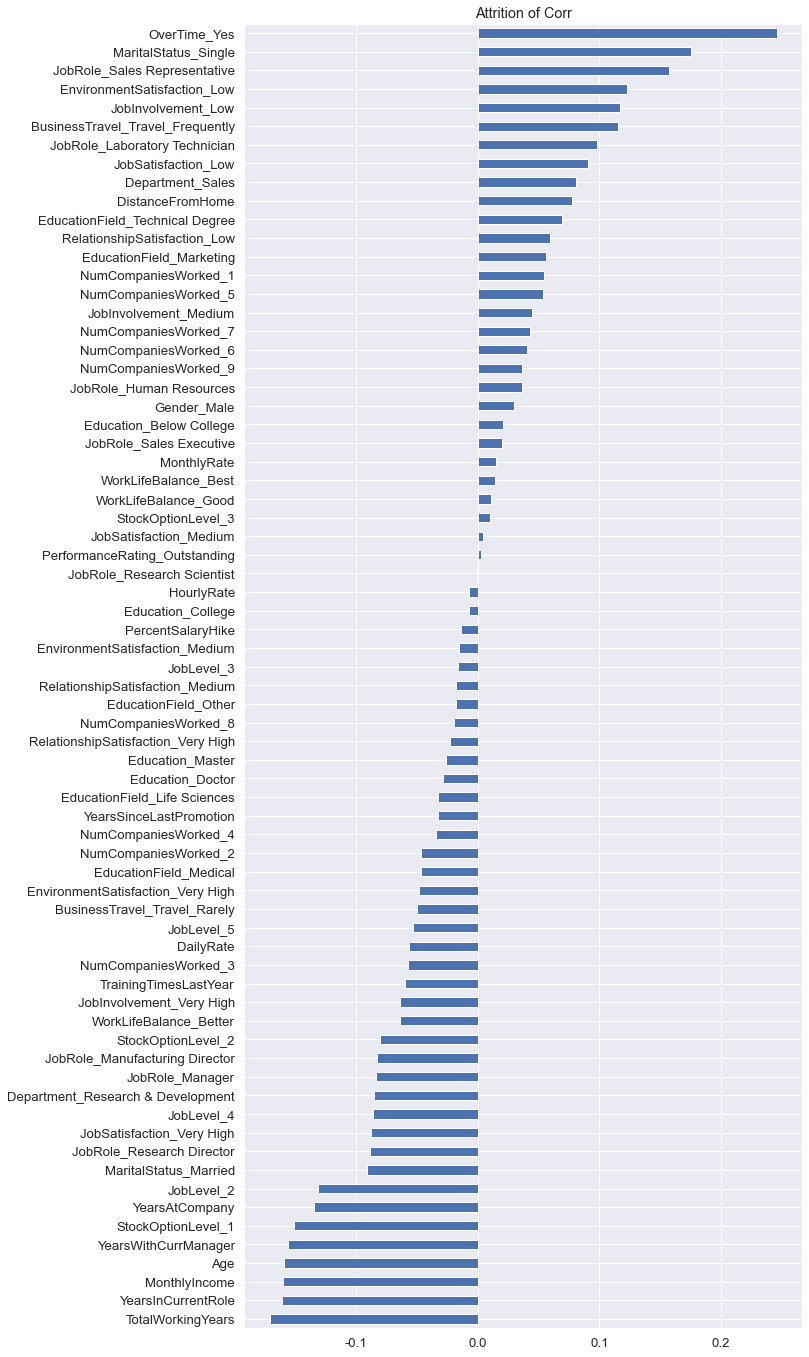

In [67]:
# 종속변수와의 상관관계
plt.title('Attrition of Corr')
data_cp.drop('Attrition_Yes', axis = 1).corrwith(data_cp.Attrition_Yes).sort_values().plot(kind='barh', figsize = (10, 24))
plt.show()

<b> VIF (Variance Inflation Factors) </b>

VIF가 10이 넘으면 다중공선성 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 봅니다. 독립 변수 a와 b가 서로 상관 관계가 있다고 했을 때 두 변수 모두 VIF가 높습니다. 

다중공선성(vif) : 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제입니다.

보통은 10 미만이면 다중공선성이 없다고 하는데, HR 데이터에는 상당히 높은 특성들이 많습니다.

일단, vif가 13000으로 너무 높은 Department 컬럼은 제외시키겠습니다.

물론 vif가 높다고 다 드랍 시킬순 없으니(Department 제외, 압도적으로 높음), 어떤 특성을 드랍시켜야하는지는 후에 고민을 해봐야 할듯하다.


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(data_corr, i) for i in range(data_corr.shape[1])]
vif['features'] = data_corr.columns
vif.sort_values('VIF factor', ascending=False)

,VIF factor,features
17,13640.716455,Department_Sales
16,13522.448575,Department_Research & Development
22,3238.702786,EducationField_Life Sciences
5,3212.315104,MonthlyIncome
24,2882.516493,EducationField_Medical
23,1749.979398,EducationField_Marketing
44,1229.895130,JobRole_Sales Executive
26,816.753726,EducationField_Technical Degree
37,740.090127,JobLevel_5
36,721.256599,JobLevel_4


<b> 가설 확인 </b>

<ul>
    <li> 가설1) 집과 회사의 거리가 먼 사람들이 퇴사를 많이 할것이다. </li>
    <li> 가설2) 월급여가 낮은 사람이 퇴사를 많이 할것이다. </li>
    <li> 가설3) 업무환경이 안좋은 사람이 퇴사를 할것이다. </li>
    <li> 가설4) 워라벨이 안좋은 사람들이 퇴사를 할것이다. </li>
    <li> 가설5) 근무부서에 따른 퇴사의 비율이 다를것이다. 즉, 특정부서가 퇴사율이 높을것이다. </li>
</ul>

In [79]:
def make_pivot(data, x, y, func) :
    table = pd.pivot_table(data=data, values= 'Age', index=x, columns=y, aggfunc=func)
    table['total'] = table['No'] + table['Yes']
    table['Attrition_rate'] = table['Yes'] / table['total'] * 100
    return table

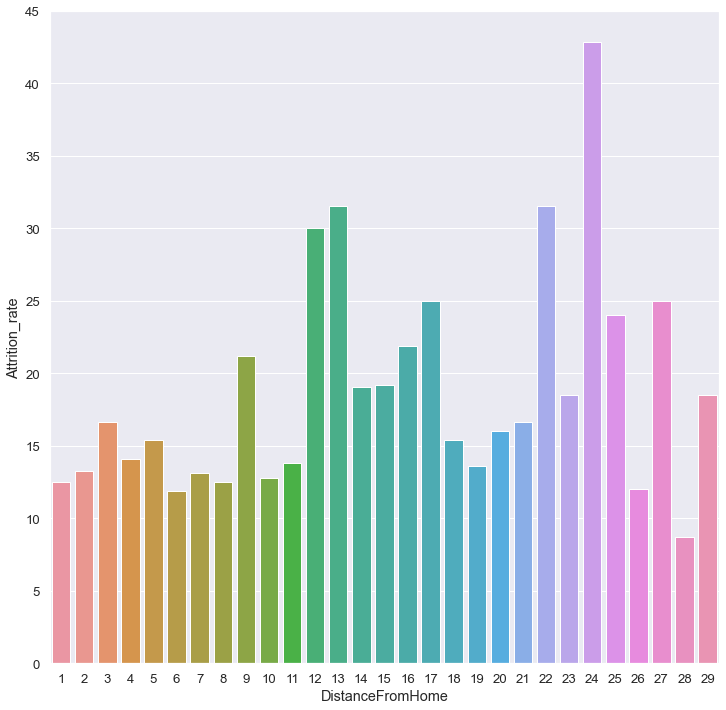

In [83]:
rate =  make_pivot(data, 'DistanceFromHome', 'Attrition', func=len)

plt.figure(figsize=(12,12))
sns.barplot(rate.index, rate.Attrition_rate)
plt.show()

In [84]:
rate

Attrition,No,Yes,total,Attrition_rate
DistanceFromHome,,,,
1,182,26,208,12.500000
2,183,28,211,13.270142
3,70,14,84,16.666667
4,55,9,64,14.062500
5,55,10,65,15.384615
6,52,7,59,11.864407
7,73,11,84,13.095238
8,70,10,80,12.500000
9,67,18,85,21.176471
